In [1]:
#K-Nearest Neighbors
#Naive Bayes
#Decision Tree
#Random Forest
#XgBoost
#Support Vector Machine
#Neural Network

In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [4]:
voice=pd.read_csv('voice.csv')
voice.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
voice.shape

(3168, 21)

In [6]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [8]:
print(voice.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [37]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [11]:
a=voice.label.value_counts()
print(a)
print("TOTAL:",voice.label.count())

label
1    1584
0    1584
Name: count, dtype: int64
TOTAL: 3168


In [12]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.436911,0.684871,0.570361,0.198513,0.686256,0.577704,0.046854,0.003489,0.921665,0.901057,...,0.436911,0.698762,0.380813,0.904450,0.279703,0.006452,0.192280,0.192418,0.173674,0
3164,0.362946,0.731172,0.262871,0.171937,0.702595,0.621185,0.015961,0.000333,0.912549,0.834545,...,0.362946,0.732760,0.126776,0.981526,0.305791,0.075269,0.167977,0.166667,0.298053,0
3165,0.484949,0.799042,0.690337,0.134329,0.786967,0.742124,0.050161,0.003469,0.855587,0.765849,...,0.484949,0.847759,0.153011,0.981526,0.164908,0.006452,0.134024,0.134120,0.208885,0
3166,0.492516,0.745692,0.695311,0.175136,0.767804,0.681107,0.041908,0.002539,0.870307,0.792241,...,0.492516,0.641561,0.127158,0.834600,0.265621,0.006452,0.164046,0.164163,0.333559,0


In [19]:
voice.corr()#correlation between different input variables

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [ ]:
#our label feature has 2 valuable male and female .these are string but we need integers for classification.Therfore we must convert them object to integers.

In [30]:
voice.label = [1 if each =="female" else 0 for each in voice.label]


In [31]:
voice.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

ModuleNotFoundError: No module named 'seaborn'

In [22]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.5 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


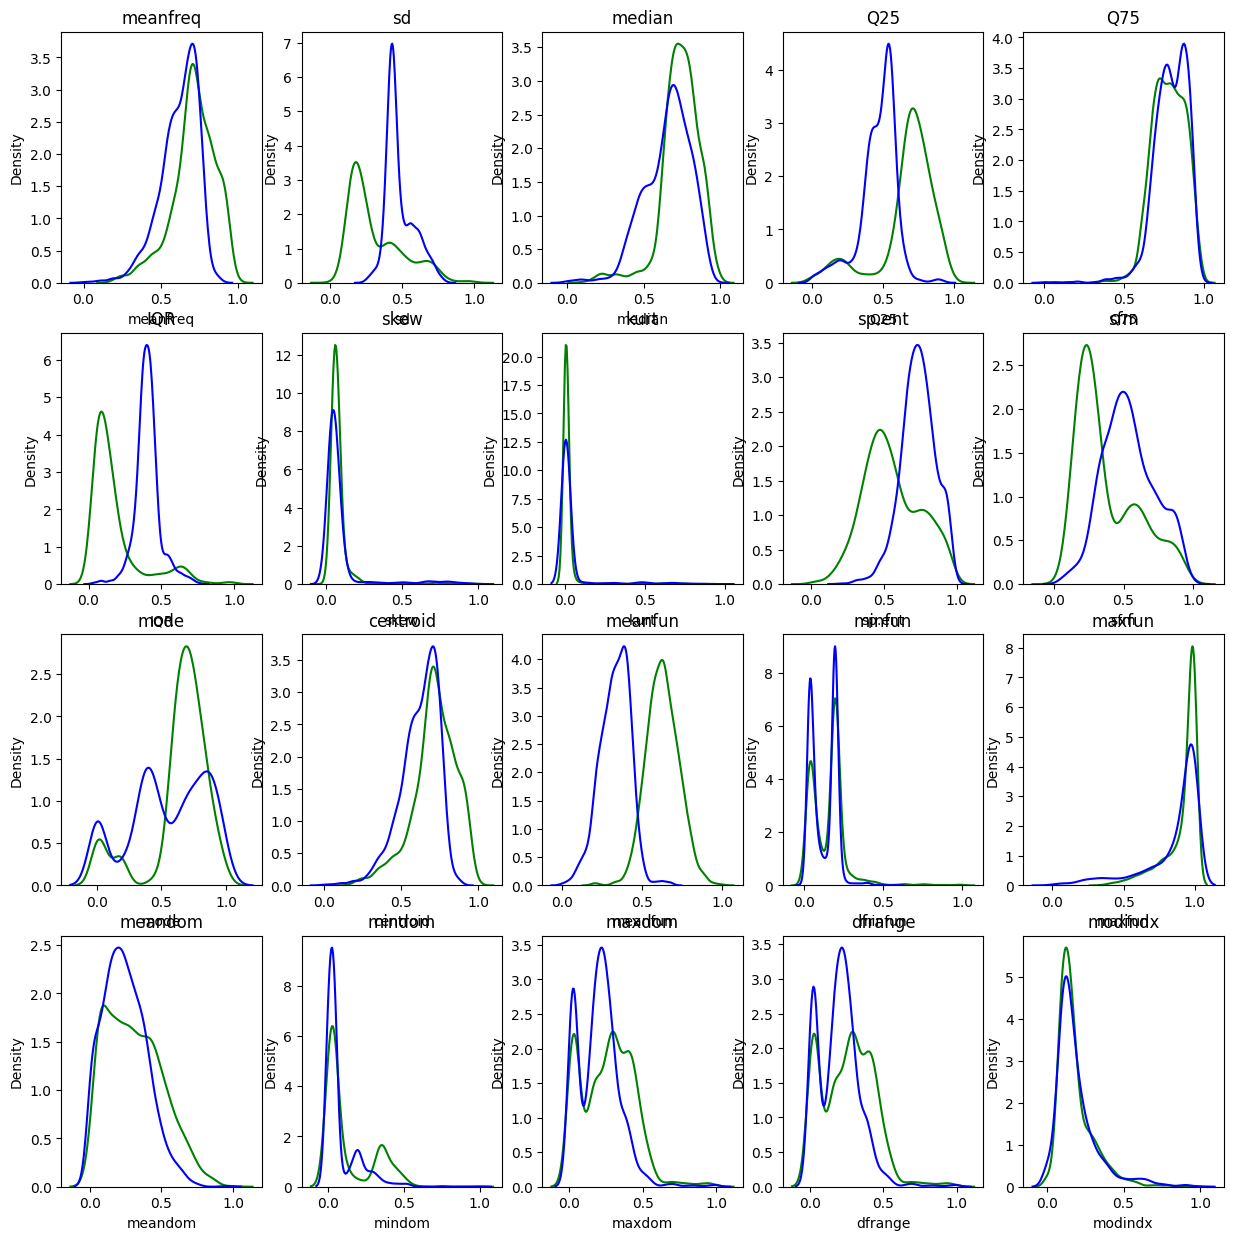

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [25]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.1/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:48
   ---------------------------------------- 0.3/124.9 MB 1.8 MB/s eta 0:01:12
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.6/124.9 MB 2.3 MB/s eta 0:00:55
   ---------------------------------------- 0.8/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 0.9/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 1.0/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 1.1/124.9 MB 2.5 MB/s eta 0:00:51
   ---------------------------------------- 1.3/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 1.3/124.9 MB 2.5 MB/s eta 

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [27]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [28]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
337,0.575238,0.437929,0.689781,0.414974,0.713955,0.379502,0.075448,0.006932,0.666317,0.508201,...,0.575238,0.253873,0.050210,0.573731,0.108329,0.193548,0.029128,0.025259,0.529712,1
653,0.276836,0.633429,0.299655,0.089318,0.494191,0.504949,0.091097,0.011402,0.908405,0.883230,...,0.276836,0.268139,0.040081,0.880415,0.095539,0.006452,0.031094,0.031116,0.268256,1
1091,0.743493,0.390129,0.838819,0.527836,0.843243,0.387554,0.045466,0.002434,0.587931,0.297283,...,0.743493,0.405871,0.214181,0.990585,0.378183,0.040860,0.256969,0.256438,0.223065,1
1729,0.663740,0.585561,0.752987,0.638773,0.843446,0.272402,0.040449,0.002112,0.834614,0.721668,...,0.663740,0.738758,0.194037,0.880415,0.247729,0.058065,0.135811,0.134835,0.386908,0
50,0.488062,0.575796,0.467035,0.358883,0.708501,0.432534,0.040786,0.003948,0.937078,0.888658,...,0.488062,0.237859,0.046114,0.594812,0.286618,0.006452,0.213009,0.213162,0.228437,1


In [29]:
test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2550,0.744323,0.140657,0.737032,0.745596,0.730999,0.052264,0.083148,0.008120,0.388793,0.222611,...,0.744323,0.580539,0.194521,0.999749,0.716623,0.040860,0.761973,0.761803,0.063378,0
2935,0.552928,0.470325,0.602918,0.541963,0.668822,0.203687,0.114900,0.033060,0.796583,0.663213,...,0.552928,0.592863,0.038617,0.954963,0.059737,0.006452,0.094353,0.094421,0.062100,0
36,0.605803,0.504145,0.584475,0.549506,0.722618,0.248023,0.051884,0.003263,0.679410,0.553321,...,0.605803,0.478840,0.035200,0.904450,0.078570,0.006452,0.027162,0.027182,0.372799,1
224,0.655725,0.470938,0.755148,0.484974,0.798841,0.389053,0.042517,0.002650,0.804061,0.618316,...,0.655725,0.316656,0.037949,0.857144,0.274066,0.195699,0.184417,0.180615,0.315633,1
103,0.614574,0.501157,0.519465,0.502766,0.866239,0.435925,0.064855,0.006249,0.745194,0.554828,...,0.614574,0.302082,0.039294,0.929285,0.070625,0.006452,0.037884,0.037911,0.153460,1


In [33]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [34]:
x_train.shape

(2217, 20)

In [35]:
x_test.shape

(951, 20)

In [36]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
337,0.575238,0.437929,0.689781,0.414974,0.713955,0.379502,0.075448,0.006932,0.666317,0.508201,0.716078,0.575238,0.253873,0.050210,0.573731,0.108329,0.193548,0.029128,0.025259,0.529712
653,0.276836,0.633429,0.299655,0.089318,0.494191,0.504949,0.091097,0.011402,0.908405,0.883230,0.025868,0.276836,0.268139,0.040081,0.880415,0.095539,0.006452,0.031094,0.031116,0.268256
1091,0.743493,0.390129,0.838819,0.527836,0.843243,0.387554,0.045466,0.002434,0.587931,0.297283,0.834921,0.743493,0.405871,0.214181,0.990585,0.378183,0.040860,0.256969,0.256438,0.223065
1729,0.663740,0.585561,0.752987,0.638773,0.843446,0.272402,0.040449,0.002112,0.834614,0.721668,0.726937,0.663740,0.738758,0.194037,0.880415,0.247729,0.058065,0.135811,0.134835,0.386908
50,0.488062,0.575796,0.467035,0.358883,0.708501,0.432534,0.040786,0.003948,0.937078,0.888658,0.214990,0.488062,0.237859,0.046114,0.594812,0.286618,0.006452,0.213009,0.213162,0.228437


In [37]:
x_train.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
660,0.575977,0.616934,0.624366,0.436932,0.808029,0.447917,0.027373,0.001785,0.899457,0.795751,0.000000,0.575977,0.377635,0.059631,0.857144,0.167071,0.006452,0.215154,0.215308,0.150740
2132,0.720007,0.244459,0.734293,0.745295,0.719873,0.041786,0.087916,0.009489,0.472757,0.356929,0.665964,0.720007,0.681437,0.287168,0.857144,0.387221,0.212903,0.313438,0.309371,0.316449
1479,0.774515,0.447577,0.817356,0.646163,0.926954,0.345717,0.052483,0.004570,0.777743,0.608060,0.911128,0.774515,0.314418,0.047141,0.659496,0.413028,0.161290,0.290565,0.287554,0.312927
624,0.558039,0.558281,0.620230,0.417519,0.790938,0.451525,0.030542,0.001543,0.894794,0.808573,0.836930,0.558039,0.219540,0.146217,0.536516,0.163761,0.058065,0.140100,0.139127,0.232854
3037,0.804177,0.254131,0.820142,0.840928,0.794911,0.015132,0.107131,0.013734,0.395580,0.262699,0.766939,0.804177,0.873774,0.371537,0.909352,0.119179,0.462366,0.038063,0.028612,0.347735


In [38]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    a = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",a)
    return a

In [44]:
 
accli=pd.read_csv('Accuracy_List.csv')
accli.set_index("Algorithm", inplace = True)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = 0
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = 0
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = 0
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = 0

accli

,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.0,0.0
Naïve Bayes,0.0,0.0
Decision Tree,0.0,0.0
Random Forest,0.0,0.0
XgBoost,0.0,0.0
Support Vector Machine,0.0,0.0
Neural Network (MLP Classifier),0.0,0.0
